In [2]:
%cd /content/drive/MyDrive/Machine Learning/Lab 07

/content/drive/MyDrive/Machine Learning/Lab 07


In [3]:
ls


 airplane_landing_199029.jpg     airplane_landing_199029.jpg.5
 airplane_landing_199029.jpg.1   CIFAR10_model_simple.h5
 airplane_landing_199029.jpg.2   image.jpg
 airplane_landing_199029.jpg.3  'Lab 07.ipynb'
 airplane_landing_199029.jpg.4


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# step 1.1: download an online image
!wget https://images.all-free-download.com/images/graphicthumb/airplane_landing_199029.jpg

--2023-06-21 12:06:17--  https://images.all-free-download.com/images/graphicthumb/airplane_landing_199029.jpg
Resolving images.all-free-download.com (images.all-free-download.com)... 51.81.66.158
Connecting to images.all-free-download.com (images.all-free-download.com)|51.81.66.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42917 (42K) [image/jpeg]
Saving to: ‘airplane_landing_199029.jpg.6’

airplane_landing_19 100%[===================>]  41.91K  --.-KB/s    in 0.001s  

2023-06-21 12:06:19 (38.3 MB/s) - ‘airplane_landing_199029.jpg.6’ saved [42917/42917]



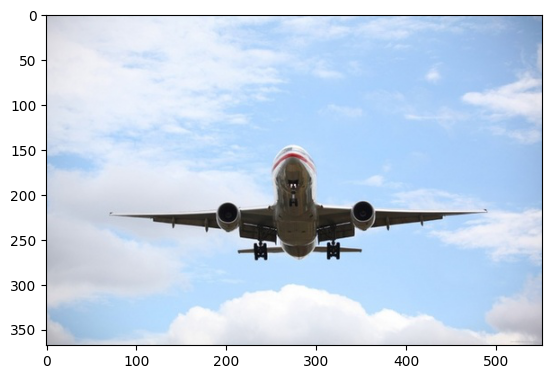

In [5]:
# step 1.2: load image into python
import matplotlib.pyplot as plt
data = plt.imread('airplane_landing_199029.jpg')
plt.imshow(data)
plt.show()

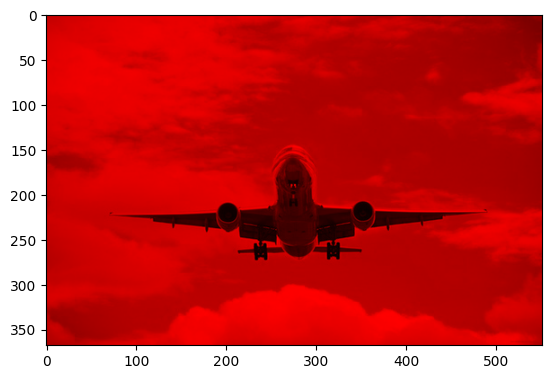

In [6]:
# step 2.1: Modify the image to red channel only
data_modified = data.copy()
data_modified[:,:,1] = 0 # set intensity of green channel to 0
data_modified[:,:,2] = 0 # set intensity of blue channel to 0
plt.imshow(data_modified) # only show red channel
plt.show()

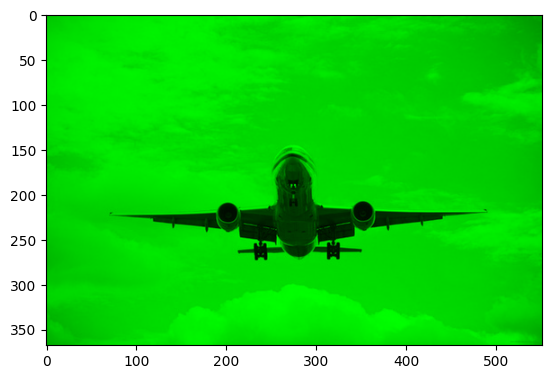

In [7]:
# step 2.2: Modify the image to green channel only
data_modified = data.copy()
data_modified[:,:,0] = 0 # set intensity of red channel to 0
data_modified[:,:,2] = 0 # set intensity of blue channel to 0
plt.imshow(data_modified) # only show red channel
plt.show()

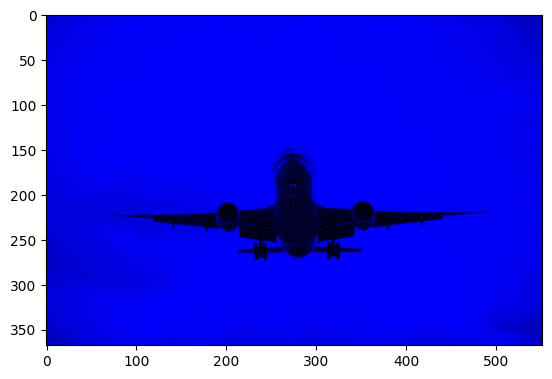

In [8]:
#MODIFY TO BLUE
data_modified = data.copy()
data_modified[:,:,0] = 0 # set intensity of red channel to 0
data_modified[:,:,1] = 0 # set intensity of green channel to 0
plt.imshow(data_modified) # only show red channel
plt.show()

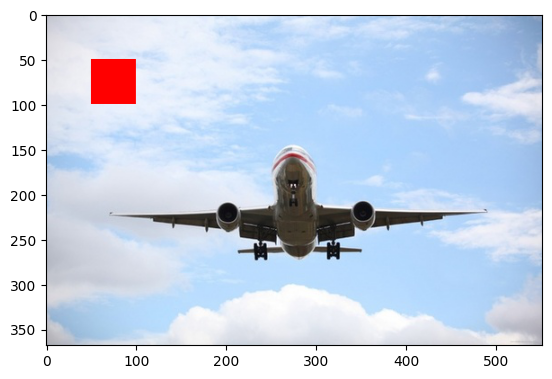

In [9]:
# step 3.1: Add red mask to the specific regions within the image**
data_modified = data.copy()
data_modified[50:100,50:100,:] = [255,0,0] # change subregion to red only, make sure the order of channel colors is [red,green,blue]
plt.imshow(data_modified)
plt.show()

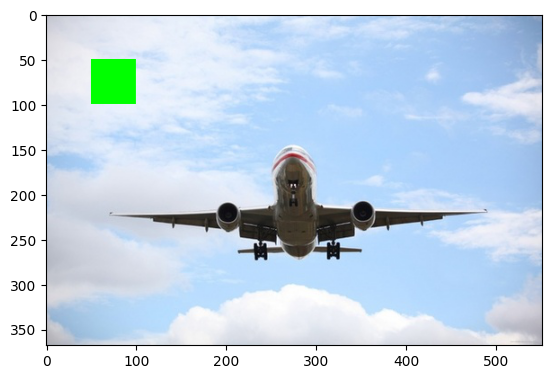

In [10]:
# step 3.2: Add green mask to the specific regions within the image**
data_modified = data.copy()
data_modified[50:100,50:100,:] = [0,255,0] # change subregion to green only, make sure the order of channel colors is [red,green,blue]
plt.imshow(data_modified)
plt.show()

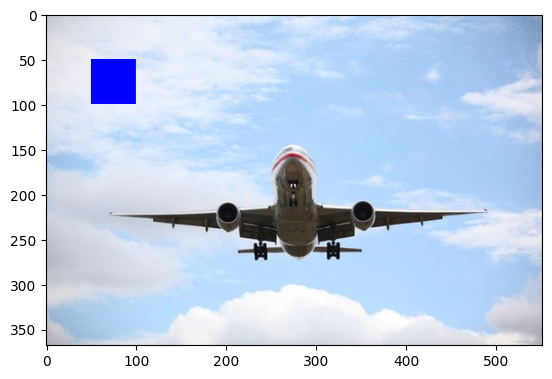

In [11]:
#ADD BLUE MASK
data_modified = data.copy()
data_modified[50:100,50:100,:] = [0,0,255]
plt.imshow(data_modified)
plt.show()


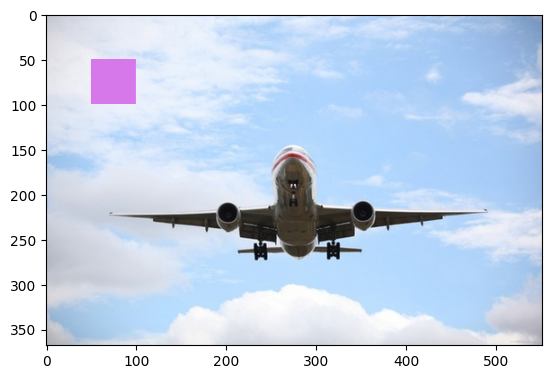

In [12]:
#ADD NEW COLOR MASK
data_modified = data.copy()
data_modified[50:100,50:100,:] = [215,120,234]
plt.imshow(data_modified)
plt.show()

In [13]:
# Step 4: Apply image processing on the CIFAR10 image dataset
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

labels_map = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 [==============================] - 16s 0us/step


In [14]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (50000, 32, 32, 3)
X_test shape:  (10000, 32, 32, 3)
y_train shape:  (50000, 1)
y_test shape:  (10000, 1)


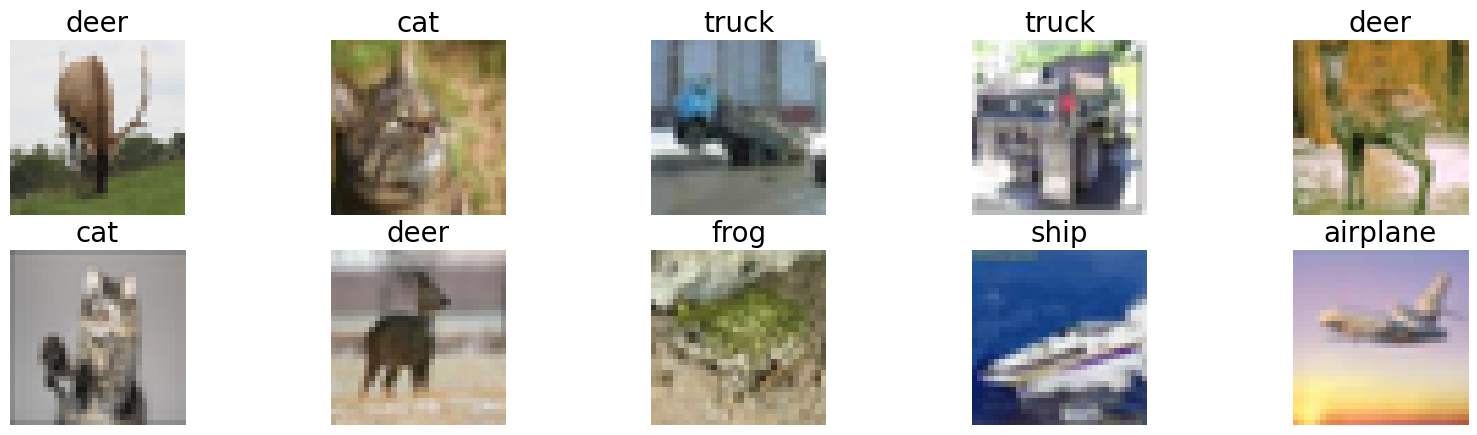

In [15]:
# Step 5: Image visualization using matplotlib
fig = plt.figure(figsize=(20, 5))
for ii in range(10):
   # sample a random image from X_train
   image_indx = np.random.choice(range(len(X_train)))
   image_random = X_train[image_indx]
   image_title = labels_map[y_train[image_indx][-1]]

   # put image into subplots
   imgplot = fig.add_subplot(2,5,ii+1)
   imgplot.imshow(image_random)
   imgplot.set_title(image_title, fontsize=20)
   imgplot.axis('off')

In [16]:
# Step 6.1: sample a random image
image_index = np.random.choice(range(len(X_train)))
image_example = X_train[image_index]

In [17]:
# Step 6.2:  Use the Python Imaging Library 'PIL' to save image into local file
import PIL
img = PIL.Image.fromarray(X_train[image_index])
img.save('image.jpg')


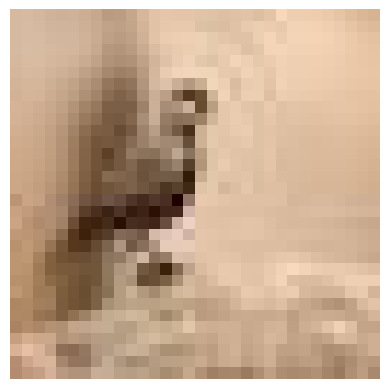

In [18]:
# Step 6.3:  reload image into python
import matplotlib.pyplot as plt
data = plt.imread('image.jpg') # read the local image
plt.imshow(data)
plt.axis('off')
plt.show()

In [19]:
print("The shape of image is: ", data.shape)

The shape of image is:  (32, 32, 3)


In [20]:
## Step 7.1: Load the dataset
from keras.datasets import cifar10
(X_data, y_data), (X_test, y_test) = cifar10.load_data()
print("Training matrix shape", X_data.shape)
print("Testing matrix shape", X_test.shape)
print("y_data matrix shape", y_data.shape)
print("y_test matrix shape", y_test.shape)
print("y_data: ",y_data)

Training matrix shape (50000, 32, 32, 3)
Testing matrix shape (10000, 32, 32, 3)
y_data matrix shape (50000, 1)
y_test matrix shape (10000, 1)
y_data:  [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


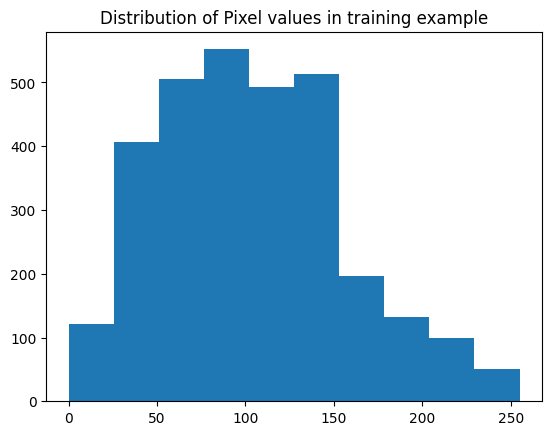

In [21]:
## Step 7.2: Plot the histogram for the pixels in each image
from matplotlib import pyplot as plt
plt.hist(X_data[0].flatten(),)
plt.title("Distribution of Pixel values in training example")
plt.show()

In [22]:
print("Shape pf X_data: ", X_data.shape) # check the shape of original data
N_train = X_data.shape[0]  # the first dimension of the tensor is number of total images
D_train = 32*32*3   # the remaining dimensions of the tensor is the shape of image, you can also use X_data.shape[1]*X_data.shape[2]*X_data.shape[3]
X_data_flatten = X_data.reshape(N_train, D_train)
X_data_flatten = X_data_flatten.astype('float32')

N_test = X_test.shape[0]
D_test = 32*32*3
X_test_flatten = X_test.reshape(N_test,D_test)
X_test_flatten = X_test_flatten.astype('float32')

print("Training matrix shape", X_data_flatten.shape)
print("Testing matrix shape", X_test_flatten.shape)

Shape pf X_data:  (50000, 32, 32, 3)
Training matrix shape (50000, 3072)
Testing matrix shape (10000, 3072)


In [23]:
X_data_flatten /= 255
X_test_flatten /= 255

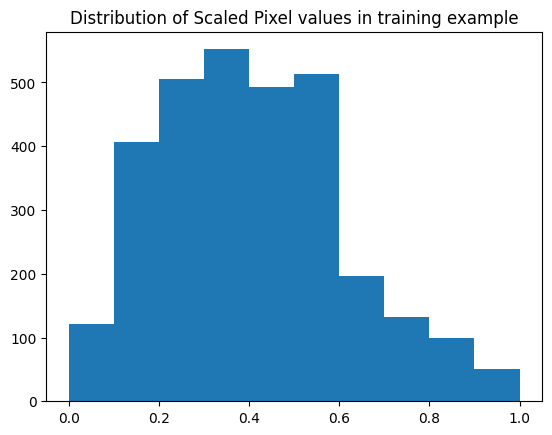

In [24]:
from matplotlib import pyplot as plt
plt.hist(X_data_flatten[0].flatten(),)
plt.title("Distribution of Scaled Pixel values in training example")
plt.show()

In [25]:
print(y_data)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [26]:
labels_map = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
nb_classes = len(labels_map)

import tensorflow as tf
y_data_categorical = tf.keras.utils.to_categorical(y_data, nb_classes)
y_test_categorical = tf.keras.utils.to_categorical(y_test, nb_classes)

print("y_data matrix shape", y_data_categorical.shape)
print("y_test matrix shape", y_test_categorical.shape)
print("y_test_categorical: ",y_test_categorical)

y_data matrix shape (50000, 10)
y_test matrix shape (10000, 10)
y_test_categorical:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [27]:
print("y_data: ",y_data.shape)

y_data:  (50000, 1)


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

## Set up training and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_data_flatten,y_data_categorical, test_size=0.2, random_state=42)
def build_model(n_layers = 3, n_neurons = 1000):
   model = Sequential() # create Sequential model
   for i in range(n_layers-1):
       model.add(Dense(n_neurons, activation = 'relu')) # you can also try other types of activation functions
   model.add(Dense(10, activation = 'softmax'))  # the output must be softmax for multi-class classifcation

   return model

model = build_model(n_layers = 3, n_neurons = 1000)
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])
train_history = model.fit(X_train,y_train, validation_data=(X_val,y_val), batch_size=128, epochs = 20)

Epoch 1/20
313/313 [==============================] - 8s 7ms/step - loss: 1.9717 - accuracy: 0.3070 - val_loss: 1.8030 - val_accuracy: 0.3543
Epoch 2/20
313/313 [==============================] - 2s 5ms/step - loss: 1.7014 - accuracy: 0.3890 - val_loss: 1.6972 - val_accuracy: 0.3858
Epoch 3/20
313/313 [==============================] - 2s 6ms/step - loss: 1.6095 - accuracy: 0.4279 - val_loss: 1.6093 - val_accuracy: 0.4187
Epoch 4/20
313/313 [==============================] - 3s 8ms/step - loss: 1.5585 - accuracy: 0.4444 - val_loss: 1.5506 - val_accuracy: 0.4414
Epoch 5/20
313/313 [==============================] - 2s 6ms/step - loss: 1.5030 - accuracy: 0.4636 - val_loss: 1.5154 - val_accuracy: 0.4592
Epoch 6/20
313/313 [==============================] - 2s 6ms/step - loss: 1.4610 - accuracy: 0.4805 - val_loss: 1.4822 - val_accuracy: 0.4700
Epoch 7/20
313/313 [==============================] - 2s 8ms/step - loss: 1.4242 - accuracy: 0.4921 - val_loss: 1.4711 - val_accuracy: 0.4722
Epoch 

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              3073000   
                                                                 
 dense_1 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 4,084,010
Trainable params: 4,084,010
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Step 11.1:  Access the model training history
print(train_history.history.keys())
print(train_history.history['loss'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
[1.9716815948486328, 1.7013893127441406, 1.6094725131988525, 1.558477759361267, 1.5029628276824951, 1.4610280990600586, 1.4241739511489868, 1.3933815956115723, 1.3669893741607666, 1.3432393074035645, 1.3180614709854126, 1.2953941822052002, 1.2595123052597046, 1.2399364709854126, 1.2199835777282715, 1.189284086227417, 1.1766846179962158, 1.1358437538146973, 1.1124480962753296, 1.0953645706176758]


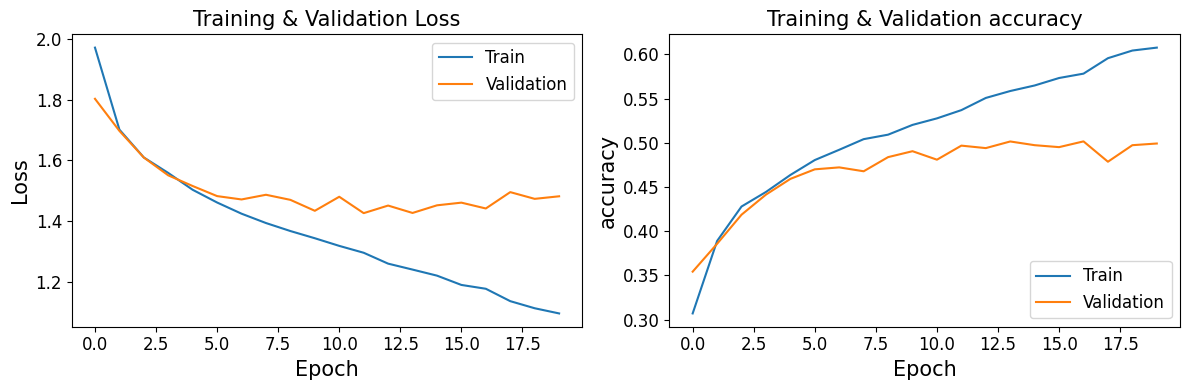

In [31]:
# Step 11.2:  Plot the learning curves for training/validation
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
# Plot training & validation loss values
plt.plot(train_history.history['loss'], label='Train')
plt.plot(train_history.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='upper right', fontsize=12)

plt.subplot(1,2,2)
# Plot training & validation accuracy values
plt.plot(train_history.history['accuracy'], label='Train')
plt.plot(train_history.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)

plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()

In [32]:
# Step 12:  Let's check the predicted labels of training data using the trained model
train_predicted_labels = model.predict(X_train[0:5,:]) # here we only predict the labels of first 5 images
print("Shape: ",train_predicted_labels.shape)
print(train_predicted_labels)

1/1 [==============================] - 0s 77ms/step
Shape:  (5, 10)
[[5.49271815e-02 9.57353041e-03 1.55825198e-01 1.97667405e-01
  9.62330028e-02 1.46208376e-01 1.90044954e-01 1.13248445e-01
  1.59564205e-02 2.03154702e-02]
 [2.24232581e-02 4.53705966e-01 7.09473789e-02 1.23091064e-01
  5.77088445e-03 3.74915190e-02 9.32499990e-02 7.22029060e-02
  3.46409529e-02 8.64759684e-02]
 [2.60700434e-02 2.45627388e-03 1.30928740e-01 9.31094065e-02
  1.06043279e-01 3.62707496e-01 2.33495887e-03 2.67782152e-01
  4.29582666e-04 8.13807081e-03]
 [2.98000015e-02 5.29161934e-03 1.75970979e-02 4.36357185e-02
  1.66494790e-02 3.54004763e-02 8.24465334e-01 2.11020168e-02
  2.60245521e-03 3.45573807e-03]
 [1.23481024e-02 2.83080590e-04 5.13105355e-02 3.22121531e-01
  1.91927508e-01 2.69934118e-01 1.37543440e-01 1.16383033e-02
  1.39116473e-03 1.50229316e-03]]


In [33]:
import numpy as np
np.argmax(train_predicted_labels,axis=1) # find the index of column which has maximum value in each row

array([3, 1, 5, 6, 3])

In [34]:
# Step 13:  Evaluate the classification performance
from sklearn.metrics import accuracy_score

In [35]:
def evaluate_model(model,train_data,val_data,test_data):
   X_train,y_train = train_data
   X_val,y_val = val_data
   X_test,y_test = test_data
    # (1) make a prediction on training set to get probablities for all classes, select the class that has maximum probablity
   y_train_pred = np.argmax(model.predict(X_train), axis=-1)
   # (2) calculate the training classification error
   Train_error_s = 1 - accuracy_score(np.argmax(y_train,axis=1), y_train_pred)
    # (3) make a prediction on validation set
   y_val_pred = np.argmax(model.predict(X_val), axis=-1)
    # (4) calculate the validation classification error
   Val_error_s = 1 - accuracy_score(np.argmax(y_val,axis=1), y_val_pred)
   # (5) make a prediction on test set
   y_test_pred = np.argmax(model.predict(X_test), axis=-1)
    # (6) calculate the test classification error
   Test_error_s = 1 - accuracy_score(y_test, y_test_pred)
    # (7) reporting results
   print("Train error: ", Train_error_s)
   print("Validation error: ", Val_error_s)
   print("Test error: ", Test_error_s)
   return Train_error_s,Val_error_s,Test_error_s


In [36]:
Train_error_s,Val_error_s,Test_error_s = evaluate_model(model,(X_train,y_train),(X_val,y_val),(X_test_flatten,y_test))

313/313 [==============================] - 1s 2ms/step
Train error:  0.3762
Validation error:  0.5008
Test error:  0.49319999999999997


In [37]:
# Step 14: Implement a function for visualizing the improvements over attempts
def visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test):
   import matplotlib.pyplot as plt
   plt.figure(figsize=(12,4))

   # Plot training error values
   plt.subplot(1,3,1)
   plt.plot(improvement_log_train, label='Train')
   plt.title('Training error', fontsize=15)
   plt.ylabel('Error', fontsize=15)
   plt.xlabel('Process', fontsize=15)
   plt.xticks(range(len(improvement_log_train)), fontsize=12)
   plt.yticks( fontsize=12)
   plt.legend(loc='upper right', fontsize=12)

   # Plot Validation error values
   plt.subplot(1,3,2)
   plt.plot(improvement_log_val, label='Validation')
   plt.title('Validation error', fontsize=15)
   plt.ylabel('Error', fontsize=15)
   plt.xlabel('Process', fontsize=15)
   plt.xticks(range(len(improvement_log_val)), fontsize=12)
   plt.yticks( fontsize=12)
   plt.legend(loc='upper right', fontsize=12)

   # Plot testing error values
   plt.subplot(1,3,3)
   plt.plot(improvement_log_test, label='Test')
   plt.title('Test error', fontsize=15)
   plt.ylabel('Error', fontsize=15)
   plt.xlabel('Process', fontsize=15)
   plt.xticks(range(len(improvement_log_test)), fontsize=12)
   plt.yticks( fontsize=12)

   plt.legend(loc='upper right', fontsize=12)
   plt.tight_layout()
   plt.show()

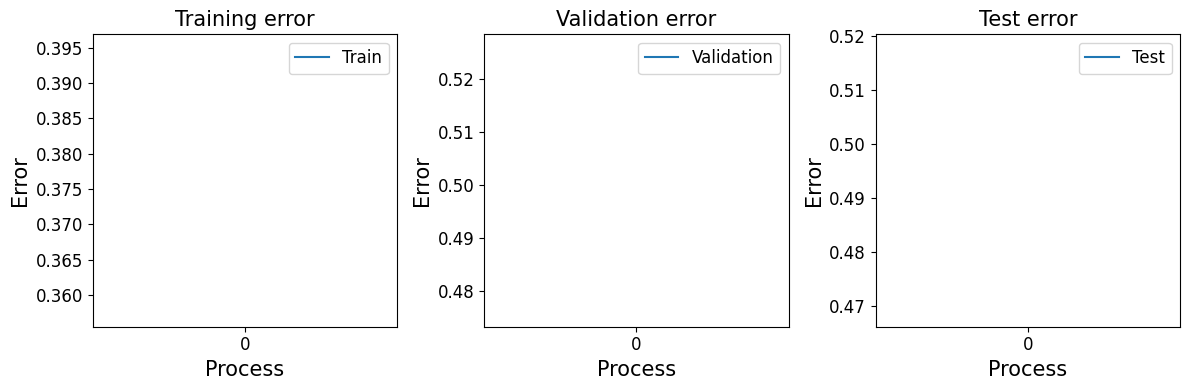

In [38]:
improvement_log_train = []
improvement_log_val = []
improvement_log_test = []
improvement_log_train.append(Train_error_s)
improvement_log_val.append(Val_error_s)
improvement_log_test.append(Test_error_s)

visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test)

In [39]:
# Step 15.0: import the load_model function
from tensorflow.keras.models import load_model

# Step 15.1: save model to local file
model.save("CIFAR10_model_simple.h5")

# Step 15.2: reload model from the local file
model_loaded = load_model("CIFAR10_model_simple.h5")

# Step 15.3: you are supposed to see same performance as previous one
y_test_pred = np.argmax(model.predict(X_test_flatten), axis=-1)
Test_error_s = 1 - accuracy_score(y_test, y_test_pred)

print("Test results: ",Test_error_s)

313/313 [==============================] - 1s 2ms/step
Test results:  0.49319999999999997


In [40]:
# Step 16: second attempt: Check if feature normalization improves results
def build_model(n_layers = 2, n_neurons = 1000):
    model = Sequential() # create Sequential model
    for i in range(n_layers-1):
          model.add(Dense(n_neurons, activation = 'relu')) # you can also try other types of activation functions

    model.add(Dense(10, activation = 'softmax'))  # the output must be softmax for multi-class classifcation
    return model

In [41]:
model = build_model(n_layers = 3, n_neurons = 1000)
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [42]:
# Step 16.2: Apply feature normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train.astype(np.float32))
X_val_s = scaler.transform(X_val.astype(np.float32))
X_test_s = scaler.transform(X_test_flatten.astype(np.float32))

In [43]:
# Step 16.3: Training the model on the scaled data
train_history = model.fit(X_train_s,y_train, validation_data=(X_val_s,y_val), batch_size=128, epochs = 20) # Make sure using scaled training and scaled validation.

# Step 16.4: Evaluate this model again to see any improvements
Train_error_s,Val_error_s,Test_error_s = evaluate_model(model,(X_train_s,y_train),(X_val_s,y_val),(X_test_s,y_test))

Epoch 1/20
313/313 [==============================] - 3s 7ms/step - loss: 1.7641 - accuracy: 0.3992 - val_loss: 1.5456 - val_accuracy: 0.4509
Epoch 2/20
313/313 [==============================] - 2s 5ms/step - loss: 1.4681 - accuracy: 0.4817 - val_loss: 1.5025 - val_accuracy: 0.4773
Epoch 3/20
313/313 [==============================] - 2s 5ms/step - loss: 1.3648 - accuracy: 0.5186 - val_loss: 1.4727 - val_accuracy: 0.4905
Epoch 4/20
313/313 [==============================] - 2s 6ms/step - loss: 1.2765 - accuracy: 0.5491 - val_loss: 1.4699 - val_accuracy: 0.4927
Epoch 5/20
313/313 [==============================] - 2s 7ms/step - loss: 1.1955 - accuracy: 0.5809 - val_loss: 1.4676 - val_accuracy: 0.5013
Epoch 6/20
313/313 [==============================] - 2s 6ms/step - loss: 1.1272 - accuracy: 0.6019 - val_loss: 1.5183 - val_accuracy: 0.5032
Epoch 7/20
313/313 [==============================] - 2s 5ms/step - loss: 1.0627 - accuracy: 0.6237 - val_loss: 1.5262 - val_accuracy: 0.5104
Epoch 

In [44]:
# Step 16.5: Let's visualize the improvements
improvement_log_train.append(Train_error_s)
improvement_log_val.append(Val_error_s)
improvement_log_test.append(Test_error_s)

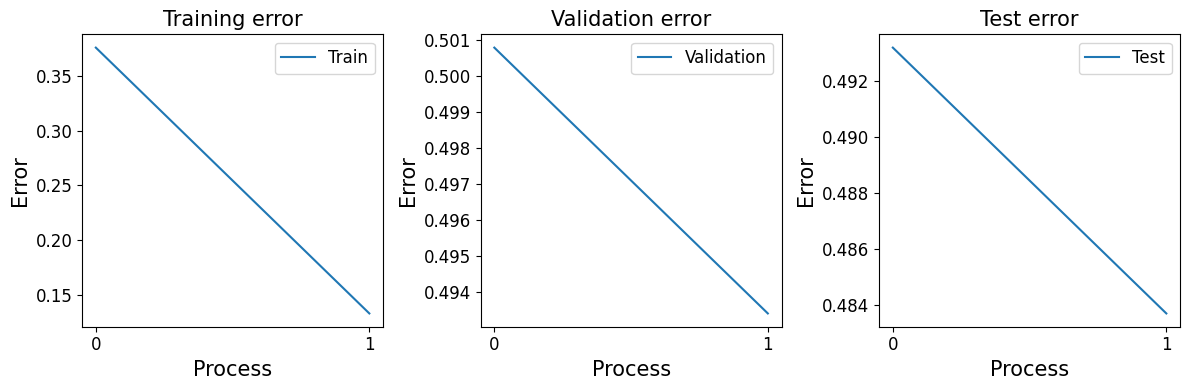

In [45]:
visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test)

In [46]:
# Step 17: third attempt: increase model complexity by adding more hidden layers
def build_model(n_layers = 5, n_neurons = 1000):
    model = Sequential() # create Sequential model
    for i in range(n_layers-1):
          model.add(Dense(n_neurons, activation = 'relu')) # you can also try other types of activation functions

    model.add(Dense(10, activation = 'softmax'))  # the output must be softmax for multi-class classifcation
    return model

In [47]:
# Step 17.1: let's increase the number of layers in model definition
model = build_model(n_layers = 5, n_neurons = 1000)
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [48]:
# Step 17.2: let's re-use Step 16's code, and include the normalization step due to its improvement.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train.astype(np.float32))
X_val_s = scaler.transform(X_val.astype(np.float32))
X_test_s = scaler.transform(X_test_flatten.astype(np.float32))

# Step 17.3: Let's start retraining the model
train_history = model.fit(X_train_s,y_train, validation_data=(X_val_s,y_val), batch_size=128, epochs = 20)
Train_error_s,Val_error_s,Test_error_s = evaluate_model(model,(X_train_s,y_train),(X_val_s,y_val),(X_test_s,y_test))

Epoch 1/20
313/313 [==============================] - 5s 9ms/step - loss: 1.7285 - accuracy: 0.3846 - val_loss: 1.5713 - val_accuracy: 0.4452
Epoch 2/20
313/313 [==============================] - 2s 6ms/step - loss: 1.4911 - accuracy: 0.4723 - val_loss: 1.5231 - val_accuracy: 0.4622
Epoch 3/20
313/313 [==============================] - 2s 6ms/step - loss: 1.3721 - accuracy: 0.5135 - val_loss: 1.4665 - val_accuracy: 0.4866
Epoch 4/20
313/313 [==============================] - 2s 6ms/step - loss: 1.2787 - accuracy: 0.5443 - val_loss: 1.4586 - val_accuracy: 0.4984
Epoch 5/20
313/313 [==============================] - 2s 5ms/step - loss: 1.1993 - accuracy: 0.5717 - val_loss: 1.4212 - val_accuracy: 0.5087
Epoch 6/20
313/313 [==============================] - 2s 5ms/step - loss: 1.1138 - accuracy: 0.6006 - val_loss: 1.4341 - val_accuracy: 0.5145
Epoch 7/20
313/313 [==============================] - 2s 7ms/step - loss: 1.0494 - accuracy: 0.6224 - val_loss: 1.4204 - val_accuracy: 0.5216
Epoch 

In [49]:
# Step 17.4: Let's visualize the improvements
improvement_log_train.append(Train_error_s)
improvement_log_val.append(Val_error_s)
improvement_log_test.append(Test_error_s)

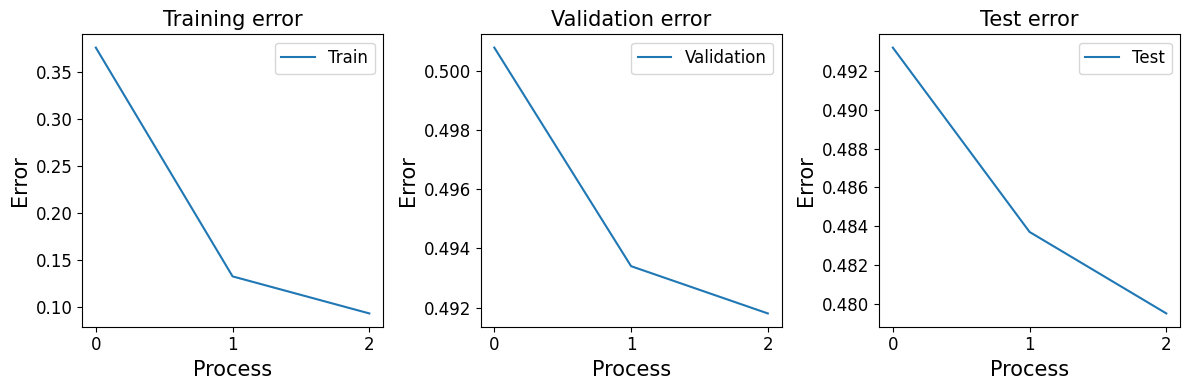

In [50]:
visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test)


In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1000)              3073000   
                                                                 
 dense_7 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_8 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_9 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_10 (Dense)            (None, 10)                10010     
                                                                 
Total params: 6,086,010
Trainable params: 6,086,010
Non-trainable params: 0
_________________________________________________________________


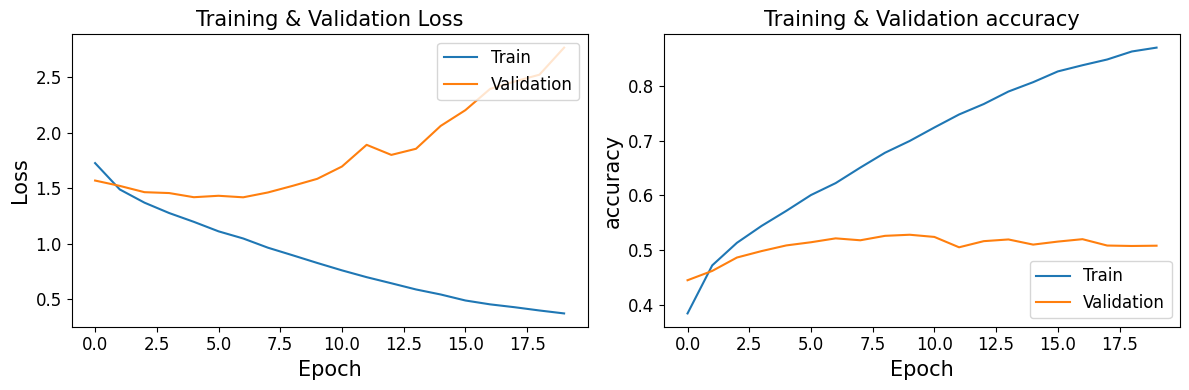

In [52]:
# Step 11.2:  Plot the learning curves for training/validation
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
# Plot training & validation loss values
plt.plot(train_history.history['loss'], label='Train')
plt.plot(train_history.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='upper right', fontsize=12)

plt.subplot(1,2,2)
# Plot training & validation accuracy values
plt.plot(train_history.history['accuracy'], label='Train')
plt.plot(train_history.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)

plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()

In [53]:
# Step 18: forth attempt: increase the epoches during training
def build_model(n_layers = 5, n_neurons = 1000):
    model = Sequential() # create Sequential model
    for i in range(n_layers-1):
          model.add(Dense(n_neurons, activation = 'relu')) # you can also try other types of activation functions

    model.add(Dense(10, activation = 'softmax'))  # the output must be softmax for multi-class classifcation
    return model

In [54]:
# Step 18.1: let's use the same architecture in Step 17
model = build_model(n_layers = 5, n_neurons = 1000)
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [55]:
# Step 18.2: let's re-use Step 16's code, and include the normalization step due to its improvement.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train.astype(np.float32))
X_val_s = scaler.transform(X_val.astype(np.float32))
X_test_s = scaler.transform(X_test_flatten.astype(np.float32))

# Step 18.3: Let's start retraining the model with epochs = 30
train_history = model.fit(X_train_s,y_train, validation_data=(X_val_s,y_val), batch_size=128, epochs = 30)

Epoch 1/30
313/313 [==============================] - 5s 9ms/step - loss: 1.7303 - accuracy: 0.3865 - val_loss: 1.5882 - val_accuracy: 0.4348
Epoch 2/30
313/313 [==============================] - 2s 7ms/step - loss: 1.4951 - accuracy: 0.4706 - val_loss: 1.4833 - val_accuracy: 0.4759
Epoch 3/30
313/313 [==============================] - 2s 6ms/step - loss: 1.3804 - accuracy: 0.5123 - val_loss: 1.4667 - val_accuracy: 0.4882
Epoch 4/30
313/313 [==============================] - 2s 6ms/step - loss: 1.2767 - accuracy: 0.5447 - val_loss: 1.4576 - val_accuracy: 0.4926
Epoch 5/30
313/313 [==============================] - 2s 5ms/step - loss: 1.1935 - accuracy: 0.5753 - val_loss: 1.4419 - val_accuracy: 0.5157
Epoch 6/30
313/313 [==============================] - 2s 6ms/step - loss: 1.1207 - accuracy: 0.5971 - val_loss: 1.4332 - val_accuracy: 0.5136
Epoch 7/30
313/313 [==============================] - 2s 5ms/step - loss: 1.0451 - accuracy: 0.6182 - val_loss: 1.4639 - val_accuracy: 0.5175
Epoch 

In [56]:
# Step 18.4: let's evaluate the model again, I expected to see worse validation results due to overfitting
Train_error_s,Val_error_s,Test_error_s = evaluate_model(model,(X_train_s,y_train),(X_val_s,y_val),(X_test_s,y_test))

313/313 [==============================] - 1s 2ms/step
Train error:  0.065025
Validation error:  0.4841
Test error:  0.474


In [57]:
# Step 18.5: Let's visualize the improvements
improvement_log_train.append(Train_error_s)
improvement_log_val.append(Val_error_s)
improvement_log_test.append(Test_error_s)

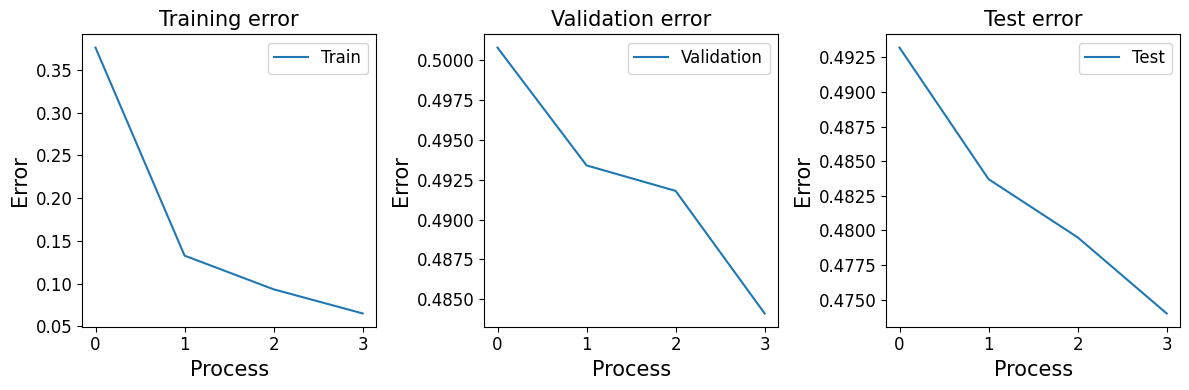

In [58]:
visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test)


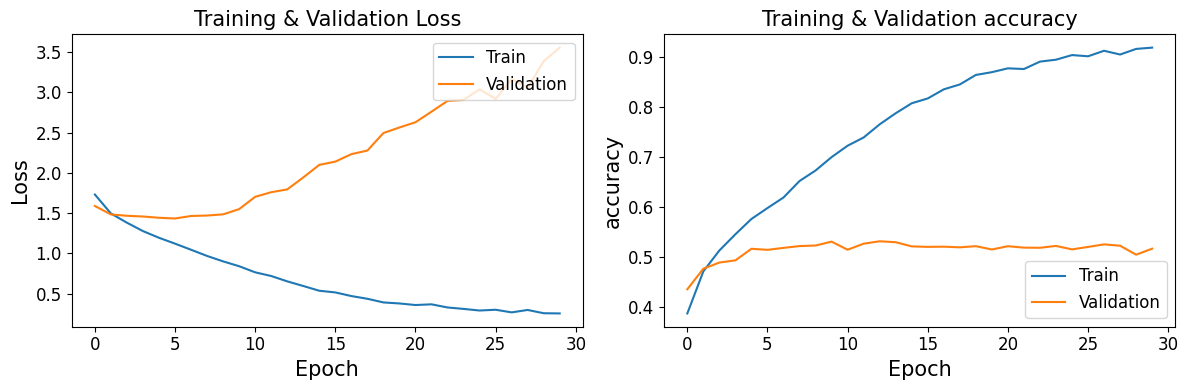

In [59]:
# Step 19: Visualize the learning curves during training to diagnose the overfitting
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)

# Step 19.1: Plot training & validation loss values
plt.plot(train_history.history['loss'], label='Train')
plt.plot(train_history.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='upper right', fontsize=12)

plt.subplot(1,2,2)

# Step 19.2: Plot training & validation accuracy values
plt.plot(train_history.history['accuracy'], label='Train')
plt.plot(train_history.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()

In [60]:
## Step 20: add a dropout layer to avoid overfitting
from tensorflow.keras.layers import Dropout
def build_model(n_layers = 2, n_neurons = 1000):
    model = Sequential() # create Sequential model
    for i in range(n_layers-1):
        model.add(Dense(n_neurons, activation = 'relu'))
        model.add(Dropout(0.2))
    model.add(Dense(10, activation = 'softmax'))
    return model

In [61]:
# Step 20.1: let's use the same architecture in Step 17
model = build_model(n_layers = 5, n_neurons = 1000)
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [62]:
# Step 20.2: let's re-use Step 16's code, and include the normalization step due to its improvement.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train.astype(np.float32))
X_val_s = scaler.transform(X_val.astype(np.float32))
X_test_s = scaler.transform(X_test_flatten.astype(np.float32))

# Step 20.3: Let's start retraining the model with epochs = 30
train_history = model.fit(X_train_s,y_train, validation_data=(X_val_s,y_val), batch_size=128, epochs = 30)

Epoch 1/30
313/313 [==============================] - 5s 8ms/step - loss: 1.8464 - accuracy: 0.3447 - val_loss: 1.6662 - val_accuracy: 0.4066
Epoch 2/30
313/313 [==============================] - 2s 6ms/step - loss: 1.6446 - accuracy: 0.4187 - val_loss: 1.5616 - val_accuracy: 0.4498
Epoch 3/30
313/313 [==============================] - 2s 6ms/step - loss: 1.5643 - accuracy: 0.4485 - val_loss: 1.5656 - val_accuracy: 0.4468
Epoch 4/30
313/313 [==============================] - 2s 6ms/step - loss: 1.5084 - accuracy: 0.4664 - val_loss: 1.5061 - val_accuracy: 0.4650
Epoch 5/30
313/313 [==============================] - 2s 5ms/step - loss: 1.4579 - accuracy: 0.4846 - val_loss: 1.4791 - val_accuracy: 0.4796
Epoch 6/30
313/313 [==============================] - 2s 6ms/step - loss: 1.4249 - accuracy: 0.4981 - val_loss: 1.4346 - val_accuracy: 0.4974
Epoch 7/30
313/313 [==============================] - 2s 7ms/step - loss: 1.3896 - accuracy: 0.5106 - val_loss: 1.4318 - val_accuracy: 0.4913
Epoch 

In [63]:
# Step 20.4: let's evaluate the model again, I expected to see better validation results as we use regularizations
Train_error_s,Val_error_s,Test_error_s = evaluate_model(model,(X_train_s,y_train),(X_val_s,y_val),(X_test_s,y_test))


313/313 [==============================] - 1s 2ms/step
Train error:  0.24787499999999996
Validation error:  0.46609999999999996
Test error:  0.46619999999999995


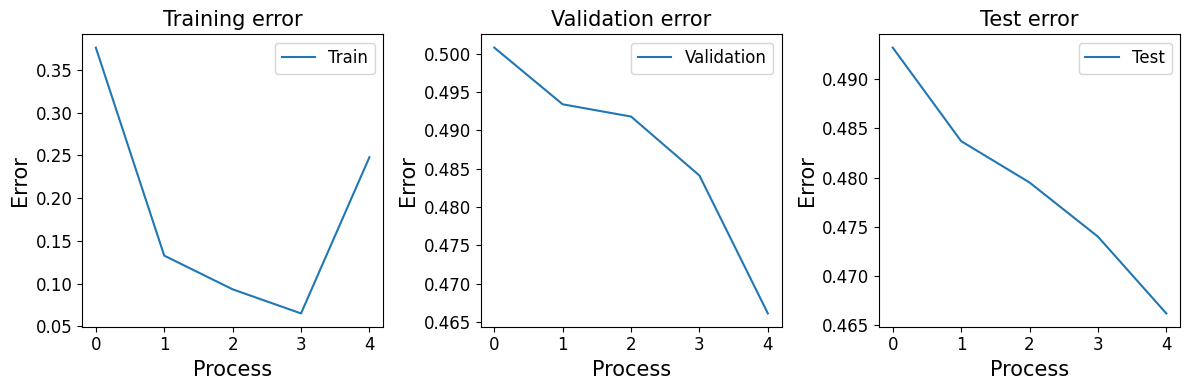

In [64]:
# Step 20.5: Let's visualize the improvements
improvement_log_train.append(Train_error_s)
improvement_log_val.append(Val_error_s)
improvement_log_test.append(Test_error_s)

visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test)

In [65]:
# Step 21.1: Adding normalization layer
from keras.layers import Dropout
from keras.layers import BatchNormalization

def build_model(n_layers = 2, n_neurons = 1000):
   model = Sequential() # create Sequential model
   for i in range(n_layers-1):
       model.add(Dense(n_neurons, activation = 'relu'))
       model.add(BatchNormalization()) # add normalization here
       model.add(Dropout(0.2))
   model.add(Dense(10, activation = 'softmax'))
   return model

In [66]:
# Step 21.2: retraining the model with same settings
model = build_model(n_layers = 5, n_neurons = 1000)
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [67]:
# Step 21.2: let's re-use Step 16's code, and include the normalization step due to its improvement.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train.astype(np.float32))
X_val_s = scaler.transform(X_val.astype(np.float32))
X_test_s = scaler.transform(X_test_flatten.astype(np.float32))

# Step 21.3: Let's start retraining the model with epochs = 30
train_history = model.fit(X_train_s,y_train, validation_data=(X_val_s,y_val), batch_size=128, epochs = 30)

Epoch 1/30
313/313 [==============================] - 8s 13ms/step - loss: 1.9688 - accuracy: 0.3429 - val_loss: 1.7007 - val_accuracy: 0.4112
Epoch 2/30
313/313 [==============================] - 3s 9ms/step - loss: 1.6035 - accuracy: 0.4356 - val_loss: 1.4929 - val_accuracy: 0.4791
Epoch 3/30
313/313 [==============================] - 3s 9ms/step - loss: 1.4668 - accuracy: 0.4800 - val_loss: 1.4942 - val_accuracy: 0.4833
Epoch 4/30
313/313 [==============================] - 3s 9ms/step - loss: 1.3798 - accuracy: 0.5094 - val_loss: 1.4037 - val_accuracy: 0.5071
Epoch 5/30
313/313 [==============================] - 3s 11ms/step - loss: 1.3010 - accuracy: 0.5388 - val_loss: 1.4039 - val_accuracy: 0.5115
Epoch 6/30
313/313 [==============================] - 3s 11ms/step - loss: 1.2470 - accuracy: 0.5563 - val_loss: 1.3686 - val_accuracy: 0.5254
Epoch 7/30
313/313 [==============================] - 3s 8ms/step - loss: 1.1987 - accuracy: 0.5733 - val_loss: 1.3210 - val_accuracy: 0.5465
Epo

In [68]:
# Step 21.4: let's evaluate the model again
Train_error_s,Val_error_s,Test_error_s = evaluate_model(model,(X_train_s,y_train),(X_val_s,y_val),(X_test_s,y_test))

313/313 [==============================] - 1s 2ms/step
Train error:  0.038024999999999975
Validation error:  0.4313
Test error:  0.4345


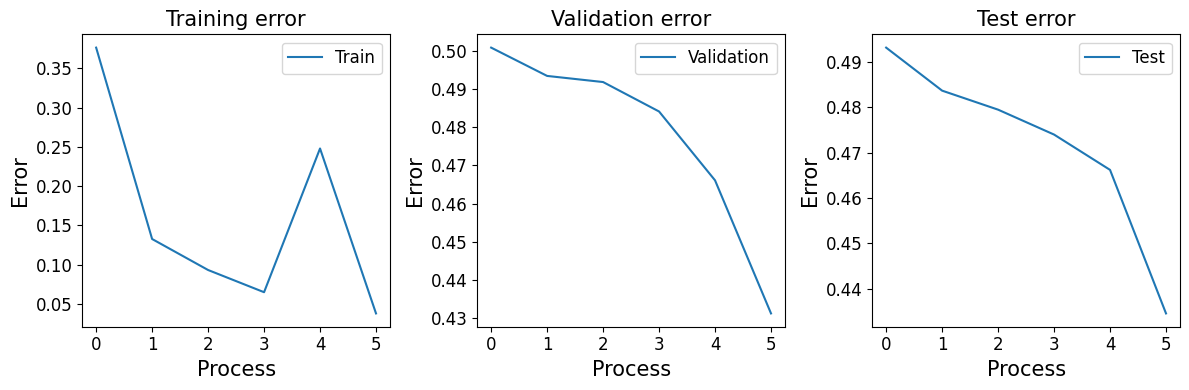

In [69]:
# Step 21.5: Let's visualize the improvements
improvement_log_train.append(Train_error_s)
improvement_log_val.append(Val_error_s)
improvement_log_test.append(Test_error_s)

visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test)

In [70]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 1000)              3073000   
                                                                 
 batch_normalization (BatchN  (None, 1000)             4000      
 ormalization)                                                   
                                                                 
 dropout_4 (Dropout)         (None, 1000)              0         
                                                                 
 dense_22 (Dense)            (None, 1000)              1001000   
                                                                 
 batch_normalization_1 (Batc  (None, 1000)             4000      
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 1000)             

In [71]:
# Step 22.1: Add early stop into model training
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
keras_callbacks = [
      EarlyStopping(monitor='val_loss', patience=10, mode='min', min_delta=0.0001),
      ModelCheckpoint('./checkmodel.h5', monitor='val_loss', save_best_only=True, mode='min')
]

In [72]:
# Step 22.2: retraining the model with same settings
model = build_model(n_layers = 5, n_neurons = 1000)
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [73]:
# Step 22.2: let's re-use Step 16's code, and include the normalization step due to its improvement.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train.astype(np.float32))
X_val_s = scaler.transform(X_val.astype(np.float32))
X_test_s = scaler.transform(X_test_flatten.astype(np.float32))

# Step 22.3: Let's start retraining the model with epochs = 50
train_history = model.fit(X_train_s,y_train, validation_data=(X_val_s,y_val), batch_size=128, epochs = 30, callbacks=keras_callbacks) # add callbacks here

Epoch 1/30
313/313 [==============================] - 7s 10ms/step - loss: 1.9628 - accuracy: 0.3452 - val_loss: 1.6275 - val_accuracy: 0.4392
Epoch 2/30
313/313 [==============================] - 5s 15ms/step - loss: 1.6041 - accuracy: 0.4387 - val_loss: 1.4890 - val_accuracy: 0.4799
Epoch 3/30
313/313 [==============================] - 4s 12ms/step - loss: 1.4601 - accuracy: 0.4817 - val_loss: 1.4419 - val_accuracy: 0.5030
Epoch 4/30
313/313 [==============================] - 3s 10ms/step - loss: 1.3795 - accuracy: 0.5117 - val_loss: 1.4314 - val_accuracy: 0.4925
Epoch 5/30
313/313 [==============================] - 3s 11ms/step - loss: 1.3108 - accuracy: 0.5316 - val_loss: 1.3872 - val_accuracy: 0.5164
Epoch 6/30
313/313 [==============================] - 4s 13ms/step - loss: 1.2490 - accuracy: 0.5554 - val_loss: 1.3563 - val_accuracy: 0.5291
Epoch 7/30
313/313 [==============================] - 3s 10ms/step - loss: 1.1978 - accuracy: 0.5761 - val_loss: 1.3639 - val_accuracy: 0.5337

In [74]:
# Step 22.4: let's evaluate the model again
Train_error_s,Val_error_s,Test_error_s = evaluate_model(model,(X_train_s,y_train),(X_val_s,y_val),(X_test_s,y_test))

313/313 [==============================] - 1s 2ms/step
Train error:  0.12505
Validation error:  0.44210000000000005
Test error:  0.4405


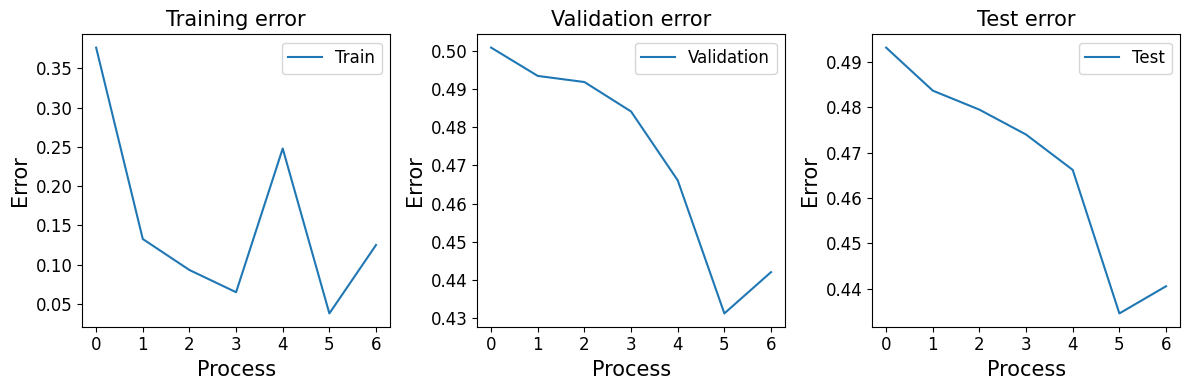

In [75]:
# Step 22.5: Let's visualize the improvements
improvement_log_train.append(Train_error_s)
improvement_log_val.append(Val_error_s)
improvement_log_test.append(Test_error_s)

visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test)

In [76]:
# Step 21.1: Adding normalization layer
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.regularizers import l2
def build_model(n_layers = 2, n_neurons = 1000):
   model = Sequential() # create Sequential model
   for i in range(n_layers-1):
       model.add(Dense(n_neurons, activation = 'relu', kernel_regularizer = l2(0.1), bias_regularizer = l2(0.1)))
       model.add(BatchNormalization()) # add normalization here
       model.add(Dropout(0.2))
   model.add(Dense(10, activation = 'softmax'))
   return model

In [77]:
# Step 21.2: retraining the model with same settings
model = build_model(n_layers = 5, n_neurons = 1000)
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [78]:
# Step 21.2: let's re-use Step 16's code, and include the normalization step due to its improvement.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train.astype(np.float32))
X_val_s = scaler.transform(X_val.astype(np.float32))
X_test_s = scaler.transform(X_test_flatten.astype(np.float32))

# Step 21.3: Let's start retraining the model with epochs = 30
train_history = model.fit(X_train_s,y_train, validation_data=(X_val_s,y_val), batch_size=128, epochs = 30)

Epoch 1/30
313/313 [==============================] - 7s 10ms/step - loss: 32.6768 - accuracy: 0.2687 - val_loss: 3.7674 - val_accuracy: 0.2147
Epoch 2/30
313/313 [==============================] - 3s 9ms/step - loss: 3.6729 - accuracy: 0.2608 - val_loss: 3.7342 - val_accuracy: 0.2487
Epoch 3/30
313/313 [==============================] - 4s 12ms/step - loss: 3.5821 - accuracy: 0.2684 - val_loss: 3.7621 - val_accuracy: 0.2310
Epoch 4/30
313/313 [==============================] - 3s 10ms/step - loss: 3.4661 - accuracy: 0.2689 - val_loss: 3.3653 - val_accuracy: 0.2601
Epoch 5/30
313/313 [==============================] - 3s 10ms/step - loss: 3.4026 - accuracy: 0.2724 - val_loss: 3.4063 - val_accuracy: 0.2586
Epoch 6/30
313/313 [==============================] - 3s 10ms/step - loss: 3.2503 - accuracy: 0.2767 - val_loss: 3.2406 - val_accuracy: 0.2349
Epoch 7/30
313/313 [==============================] - 4s 12ms/step - loss: 3.2250 - accuracy: 0.2761 - val_loss: 3.2767 - val_accuracy: 0.2176

In [79]:
# Step 21.4: let's evaluate the model again
Train_error_s,Val_error_s,Test_error_s = evaluate_model(model,(X_train_s,y_train),(X_val_s,y_val),(X_test_s,y_test))

313/313 [==============================] - 1s 3ms/step
Train error:  0.7243999999999999
Validation error:  0.7271000000000001
Test error:  0.7197


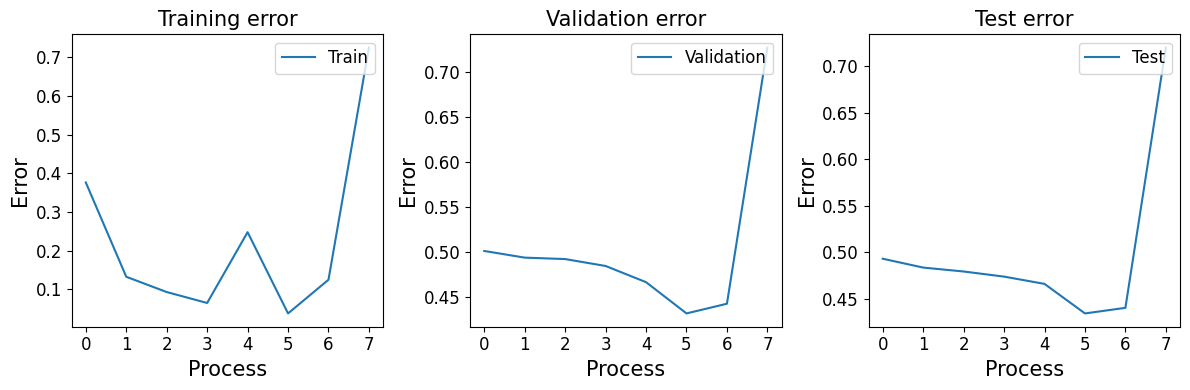

In [80]:
# Step 21.5: Let's visualize the improvements
improvement_log_train.append(Train_error_s)
improvement_log_val.append(Val_error_s)
improvement_log_test.append(Test_error_s)

visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test)

In [81]:
# Step 24: Use a convolutional neural network to improve the classification
# Step 24.1: Load dataset
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [82]:
# Step 24.2: Process the labels to get one-hot encoding
num_classes = len(labels_map)
from keras.utils.np_utils import to_categorical
y_train_onehot = to_categorical(y_train, num_classes)
y_test_onehot = to_categorical(y_test, num_classes)

In [83]:
# Step 24.3: Normalize the features using min-max
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [84]:
# Step 24.4: Get training, validation dataset
X_train_s, X_val, y_train_s, y_val = train_test_split(X_train,y_train_onehot, test_size=0.2, random_state=42)

In [85]:
# Step 24.5: Define convolutional neural network

In [86]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,MaxPooling2D
from keras import regularizers
from keras.layers import Flatten,BatchNormalization,Dropout

In [87]:
model = Sequential() # create Sequential model
model.add(Conv2D(32, (3,3), input_shape=(32,32,3), padding='same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [88]:
# Step 24.6: Start model training
history = model.fit(X_train_s,y_train_s, validation_data=(X_val,y_val), batch_size=64, epochs = 20)

Epoch 1/20
625/625 [==============================] - 13s 8ms/step - loss: 1.6496 - accuracy: 0.4394 - val_loss: 1.2787 - val_accuracy: 0.5422
Epoch 2/20
625/625 [==============================] - 5s 8ms/step - loss: 1.2595 - accuracy: 0.5636 - val_loss: 1.3454 - val_accuracy: 0.5420
Epoch 3/20
625/625 [==============================] - 5s 7ms/step - loss: 1.0978 - accuracy: 0.6187 - val_loss: 1.0868 - val_accuracy: 0.6291
Epoch 4/20
625/625 [==============================] - 5s 7ms/step - loss: 1.0143 - accuracy: 0.6509 - val_loss: 1.1217 - val_accuracy: 0.6169
Epoch 5/20
625/625 [==============================] - 5s 8ms/step - loss: 0.9562 - accuracy: 0.6702 - val_loss: 1.0068 - val_accuracy: 0.6533
Epoch 6/20
625/625 [==============================] - 5s 8ms/step - loss: 0.9072 - accuracy: 0.6857 - val_loss: 0.9318 - val_accuracy: 0.6844
Epoch 7/20
625/625 [==============================] - 4s 7ms/step - loss: 0.8727 - accuracy: 0.6985 - val_loss: 0.9220 - val_accuracy: 0.6892
Epoch

In [89]:
# Step 24.7: Let's evaluate model and visualize the improvements again
Train_error_s,Val_error_s,Test_error_s = evaluate_model(model,(X_train_s,y_train_s),(X_val,y_val),(X_test,y_test))

313/313 [==============================] - 1s 2ms/step
Train error:  0.27105
Validation error:  0.3457
Test error:  0.3499


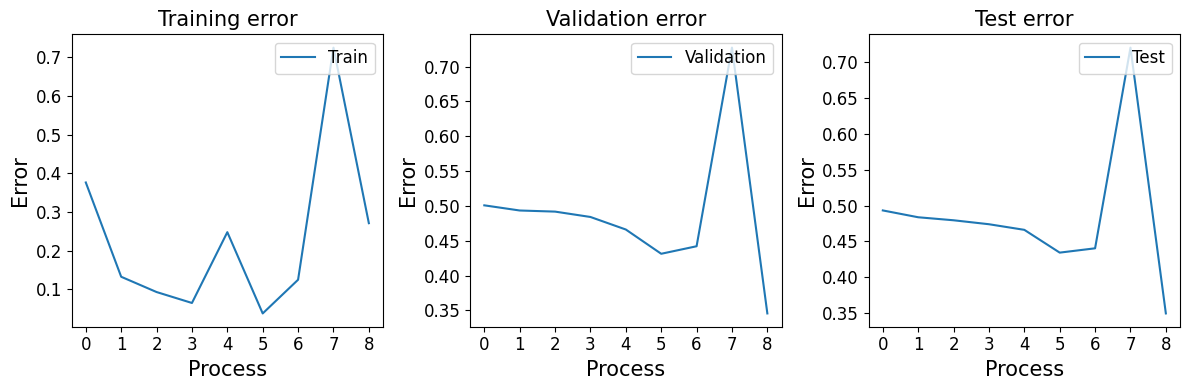

In [90]:

improvement_log_train.append(Train_error_s)
improvement_log_val.append(Val_error_s)
improvement_log_test.append(Test_error_s)
visualize_improvement(improvement_log_train,improvement_log_val,improvement_log_test)